In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from glob import glob


# Configuración desde el archivo txt (simulada aquí como un diccionario)
config = {
    'figure.constrained_layout.use': True,
    'figure.figsize': (5.4, 3.2),
    'figure.titlesize': 'small',
    'figure.labelsize': 'small',
    'font.size': 10,
    'font.family': 'serif',
    'text.usetex': False,
    'pgf.texsystem': 'lualatex',
    'pgf.rcfonts': False,
    'pgf.preamble': r'\usepackage{siunitx,fontspec}\setmainfont{Times New Roman}',
    'lines.linewidth': 1,
    'lines.markerfacecolor': 'none',
    'lines.markersize': 4,
    'legend.frameon': False,
    'legend.markerscale': 0.8,
    'legend.fontsize': 'small',
    'legend.title_fontsize': 'small',
    'legend.handlelength': 1.5,
    'legend.handletextpad': 0.2,
    'xtick.top': True,
    'xtick.major.size': 5,
    'xtick.major.width': 0.8,
    'xtick.minor.width': 0.8,
    'xtick.minor.size': 3,
    'xtick.labelsize': 'small',
    'xtick.direction': 'in',
    'ytick.right': True,
    'ytick.major.size': 5,
    'ytick.major.width': 0.8,
    'ytick.minor.width': 0.8,
    'ytick.minor.size': 3,
    'ytick.labelsize': 'small',
    'ytick.direction': 'in',
    'axes.linewidth': 0.8,
    'axes.axisbelow': False,
    'axes.labelsize': 'medium',
    'axes.labelpad': 2,
    'figure.constrained_layout.h_pad': 0.02,
    'figure.constrained_layout.w_pad': 0.01,
    'figure.constrained_layout.hspace': 0.02,
    'figure.constrained_layout.wspace': 0.02,
    'svg.fonttype': 'none'
}

# Aplicar la configuración
plt.rcParams.update(config)

C:\Users\esteb\AppData\Local\Temp\ipykernel_39056\393043162.py:22: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


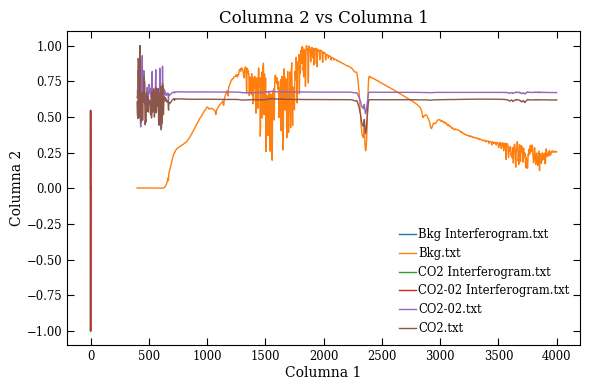

In [2]:
ruta_actual = os.getcwd()
carpeta_data = os.path.join(ruta_actual, 'data')
archivos_txt = glob(os.path.join(carpeta_data, '*.txt'))


plt.figure(figsize=(6, 4))

for archivo in archivos_txt:
    # Leer archivo .txt, saltando la primera fila
    df = pd.read_csv(archivo, skiprows=1, delim_whitespace=True, header=None)  # Usa sep="\t" o sep="," si es necesario

    if df.shape[1] >= 2:  # Asegura que haya al menos dos columnas
        x = df.iloc[:, 0]
        y = df.iloc[:, 1]
        plt.plot(x, y/max(abs(y)), label=os.path.basename(archivo))

plt.xlabel('Columna 1')
plt.ylabel('Columna 2')
plt.title('Columna 2 vs Columna 1')
plt.legend()
# plt.grid(True)
plt.tight_layout()
plt.show()


C:\Users\esteb\AppData\Local\Temp\ipykernel_39056\3327989603.py:54: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


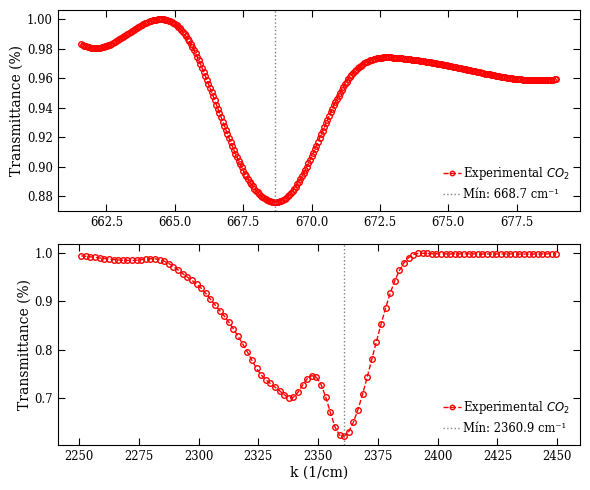

In [3]:
from scipy.interpolate import CubicSpline
from scipy.signal import savgol_filter
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Leer archivo
co2 = archivos_txt[-1]
df_co2 = pd.read_csv(co2, skiprows=1, delim_whitespace=True, header=None)   

x = df_co2.iloc[:, 0]
y = df_co2.iloc[:, 1]

plt.figure(figsize=(6, 5))

# ----------------- BENDING -----------------
plt.subplot(2, 1, 1)
filter_bending = (x >= 660) & (x <= 680)
x_bending = x[filter_bending].values
y_bending = y[filter_bending].values

# Interpolación cúbica
cs_bending = CubicSpline(x_bending, y_bending)
x_bending_fine = np.linspace(x_bending.min(), x_bending.max(), 300)
y_bending_smooth = cs_bending(x_bending_fine)

# Encontrar el mínimo
idx_min_bending = np.argmin(y_bending_smooth)
x_min_bending = x_bending_fine[idx_min_bending]

plt.plot(x_bending_fine, y_bending_smooth / max(abs(y_bending_smooth)), '--ro', label='Experimental $CO_2$')
plt.axvline(x_min_bending, color='gray', linestyle=':', label=f'Mín: {x_min_bending:.1f} cm⁻¹')
plt.ylabel('Transmittance (%)')
plt.legend(loc='lower right')

# ----------------- ASIMÉTRICO -----------------
plt.subplot(2, 1, 2)
filter_asim = (x >= 2250) & (x <= 2450)
x_asim = x[filter_asim].values
y_asim = y[filter_asim].values

y_asim_smooth = savgol_filter(y_asim, window_length=11, polyorder=3)

# Encontrar el mínimo
idx_min_asim = np.argmin(y_asim_smooth)
x_min_asim = x_asim[idx_min_asim]

plt.plot(x_asim, y_asim_smooth / max(abs(y_asim_smooth)), '--ro', label='Experimental $CO_2$')
plt.axvline(x_min_asim, color='gray', linestyle=':', label=f'Mín: {x_min_asim:.1f} cm⁻¹')
plt.xlabel('k (1/cm)')
plt.ylabel('Transmittance (%)')
plt.legend(loc='lower right')

plt.tight_layout()
plt.show()


# THz.